# Logistic Regression 

In this project, I will use gradient ascent to find the weights for the logistic regression.   

As an example, I will use the widely-used breast cancer data set. This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [ ]:
# Importing important libraries
# Import breastcancer dataset
# Import preprocessing from sklearn
# Import train_test_split from sklearn
# Import numpy,math

%matplotlib inline 
import sklearn.preprocessing
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

### Importing the dataset

In [ ]:
# Load dataset to a python variable cancer
# Store target to a variable called y
# Store feature to a variable called X

cancer = load_breast_cancer()
print(cancer.keys())
X = cancer.data
y = cancer.target
print(type(cancer))

In [ ]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [ ]:
# Use train_test_split() function to split the dataset
# Store the return value of pervious step to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

#### Scale the data since we will be using gradient ascent

In [ ]:
# Find the scaler of the dataset by using preprocessing.StandardScaler().fit()
# Using this scale to scale the X_train and X_test using .transform()
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# TODO - Print the shape of x_train and y_train 
print(X_train.shape) # It should print (426, 30)
print(y_train.shape) # It should print (426,)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [ ]:
# Append a column of ones to x_train 
# Create a column vector of ones by using np.ones and reshape
# Append a column of ones in the beginning of x_train by using np.hstack
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Now do the same for the test data

# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ", X_test.shape)
# # Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.47650454  1.06916993 -0.32927472 -0.51000382  1.70745911
   2.61802112  1.73129387  0.98172185  0.83559189  3.05774528 -0.3609251
   0.66102692 -0.39203921 -0.36008091  0.03339713  2.55009327  1.36157115
   0.38967536 -0.29990979  2.51004661 -0.23051777  2.42056437 -0.27821778
  -0.28586222  2.39571731  5.05982113  3.88349948  1.63977233  2.51102177
   6.93389202]
 [ 1.         -1.13284528 -0.42993074 -1.11459218 -0.98031335  0.78304908
  -0.34361423 -0.87030815 -0.74525945  0.39611437  1.01112495 -0.54829632
  -0.01218325 -0.58929408 -0.57257812  0.27911125 -0.63369494 -0.72789319
  -0.65232967  0.74399749  0.01591664 -1.06942183 -0.47516488 -1.06412766
  -0.91233782  0.40626955 -0.69099607 -0.96816489 -0.88853091  0.30596389
   0.2511347 ]]


### Understanding the dataset

In [ ]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# You can add your own code here to better understand the dataset


 Before writing the gradient ascent code, there are some helpful functions


 
### Sigmoid($z$)
The first function I will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [ ]:
# Write the sigmoid function
def sigmoid(z):
    sgmd = 1/(1 + np.exp(-z)) 
    return sgmd

### Initializing ${\bf w}$
For testing the next functions, I will create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (could have initialized ${\bf w}$ to any values.)

In [ ]:
# Initialize w using np.zeros()
w = np.zeros((X_train.shape[1], 1))

### Hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [ ]:
# Predict the probability that a patient has cancer 
# Write the hypothesis function 
def hypothesis(X , w):
    return sigmoid(np.dot(X,w))


### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [ ]:
# Write the log likelihood function 
def log_likelihood(X , y , w ):
  a = sum(sum(y*np.log(hypothesis(X,w)) + (1 - y)*np.log(1-hypothesis(X,w))))
  return a

print(log_likelihood(X_train, y_train, w))

-295.2806989185347


# Gradient Ascent
Now writing the code to perform gradient ascent. I will use the update rule from the lecture notes.

In [ ]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    # Initialize N to the number of training examples
    log_likelihood_values = []
    w = np.zeros((X_train.shape[1], 1))
    N = X_train.shape[0]
    y = y.reshape(y.shape[0],1)
    for i in range(num_iters): 
        # update the w using formula
        # append the log_likelihodd values to the list for every 100 iterations
        error = y - hypothesis(X, w)
        gradient = (1/N) * np.dot(X.T, error)
        w += gradient * learning_rate
        if i % 100 is 0: 
          log_likelihood_values.append(log_likelihood(X, y, w))
    return w, log_likelihood_values

### After completing the code above, run the following

In [ ]:
# Set the learning_rate
# Set the num_iters 
# Run the Logistic_Regresion_Gradient_Ascent() and store the returned values
print(X_train.shape)
print(y_train.shape)
learning_rate = 0.1
num_iters = 2646
w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate , num_iters)
print(w)
print(log_likelihood_values)

(426, 31)
(426,)
[[ 0.41236259]
 [-0.35113387]
 [-0.55621928]
 [-0.32664897]
 [-0.43929659]
 [-0.32226084]
 [ 0.43738212]
 [-0.84160684]
 [-0.91951854]
 [ 0.25510898]
 [ 0.31600747]
 [-1.43741335]
 [ 0.01992376]
 [-0.74627901]
 [-1.13433395]
 [-0.21941376]
 [ 0.85974467]
 [ 0.09319953]
 [-0.26585219]
 [ 0.4603329 ]
 [ 0.60481201]
 [-1.06579486]
 [-1.11098512]
 [-0.80971855]
 [-1.02767726]
 [-0.83842663]
 [-0.05549632]
 [-0.94969195]
 [-1.01498284]
 [-1.03741495]
 [-0.48023032]]
[-0.5228435360323179, -0.10766165228836587, -0.09039698758236035, -0.08281307650994257, -0.07825961056754271, -0.07511051434355874, -0.07274940548270988, -0.07088431081325203, -0.06935638576083991, -0.06807062469585469, -0.06696615006647834, -0.06600185195296883, -0.06514879518475511, -0.06438591473331885, -0.0636974360485484, -0.0630712581734656, -0.06249790244917881, -0.061969807925310934, -0.06148084694372121, -0.06102598466732326, -0.06060103497769499, -0.0602024821581336, -0.05982734823162897, -0.0594730924

# Plotting Likelihood v/s Number of Iterations.

Text(0.5, 0, 'Number of iterations')

Text(0, 0.5, 'Likelihood')

Text(0.5, 1.0, 'Likelihood vs Number of Iterations.')

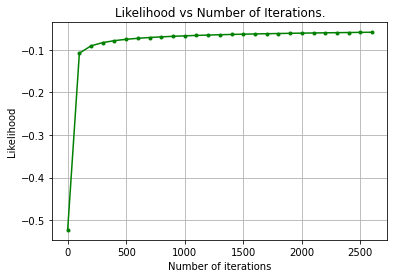

In [ ]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0, num_iters, 100))
plt.plot(iters, log_likelihood_values, '.-', color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

#  Evaluating your model

In [ ]:
# use hypothesis(...) to predict.
prediction = hypothesis(X_test, w)
print(prediction.shape)
prediction = prediction.reshape(prediction.shape[0])
print(prediction.shape)
threshold = 0.5
after_threshold = (prediction >= threshold).astype(int)

# print(after_threshold)
# y_test = y_test.reshape(y_test.shape[0])
# print(np.sum(y_test))

(143, 1)
(143,)


In [ ]:
# count TP,FP,FN,FP
TP,FP,TN,FN = 0,0,0,0

for i in range(y_test.shape[0]):
  if y_test[i] == 1 and after_threshold[i] == 1:
    TP += 1
  elif y_test[i] == 0 and after_threshold[i] == 1:
    FP += 1
  elif y_test[i] == 1 and after_threshold[i] == 0:
    FN += 1
  elif y_test[i] == 0 and after_threshold[i] == 0:
    TN += 1

# calculate precision, recall and f1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
fl = 2*(precision*recall) / (precision+recall)

print("Precision: ",precision)
print("Recall: ",recall) 
print("F1: ",fl)
print("Confusion Matrix: ")
print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)

Precision:  0.9885057471264368
Recall:  1.0
F1:  0.9942196531791908
Confusion Matrix: 
TP:  86  FN:  0  FP:  1  TN:  56


In [ ]:
##########################################
################# REPORT #################
##########################################

# Below is the set of results for all attempted hyperparameters.
# The best case result achieved was from the following hyperparameters:
# learning_rate = 0.1, num_iters = 2646, threshold = 0.5

# ------------- Best result ------------- #
# Precision:  0.9885057471264368          #
# Recall:  1.0                            #
# F1:  0.9942196531791908                 #
# Confusion Matrix:                       #
# TP:  86  FN:  0  FP:  1  TN:  56        #
# --------------------------------------- #


# # learning_rate = 0.1 / num_iters = 5000
# Precision:  0.9772727272727273
# Recall:  1.0
# F1:  0.9885057471264368
# TP:  86  FN:  0  FP:  2  TN:  55


# # learning_rate = 0.1 / num_iters = 2000
# Precision:  0.9885057471264368
# Recall:  1.0
# F1:  0.9942196531791908
# Confusion Matrix: 
# TP:  86  FN:  0  FP:  1  TN:  56


# # learning_rate = 0.1 / num_iters = 1000
# Precision:  0.9885057471264368
# Recall:  1.0
# F1:  0.9942196531791908
#TP:  86  FN:  0  FP:  1  TN:  56


# # learning_rate = 0.5 / num_iters = 5000
# Precision:  0.9767441860465116
# Recall:  0.9767441860465116
# F1:  0.9767441860465116
# Confusion Matrix: 
# TP:  84  FN:  2  FP:  2  TN:  55


# # learning_rate = 0.5 / num_iters = 2000
# Precision:  0.9767441860465116
# Recall:  0.9767441860465116
# F1:  0.9767441860465116
# Confusion Matrix: 
# TP:  84  FN:  2  FP:  2  TN:  55


# # learning_rate = 0.5 / num_iters = 1000
# Precision:  0.9772727272727273
# Recall:  1.0
# F1:  0.9885057471264368
# Confusion Matrix: 
# TP:  86  FN:  0  FP:  2  TN:  55